<a href="https://colab.research.google.com/github/betheman/Classification/blob/master/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df=pd.read_csv('./framingham.csv')

In [97]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [99]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [0]:
df.interpolate(method ='linear', limit_direction ='forward',inplace=True) 

In [101]:
df.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [102]:
df.groupby('education').count()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
education,,,,,,,,,,,,,,,
1.000000,1731,1731,1731,1731,1731,1731,1731,1731,1731,1731,1731,1731,1731,1731,1731
1.333333,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1.500000,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25
1.666667,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1.666667,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2.000000,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286
2.333333,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2.500000,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
3.000000,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700


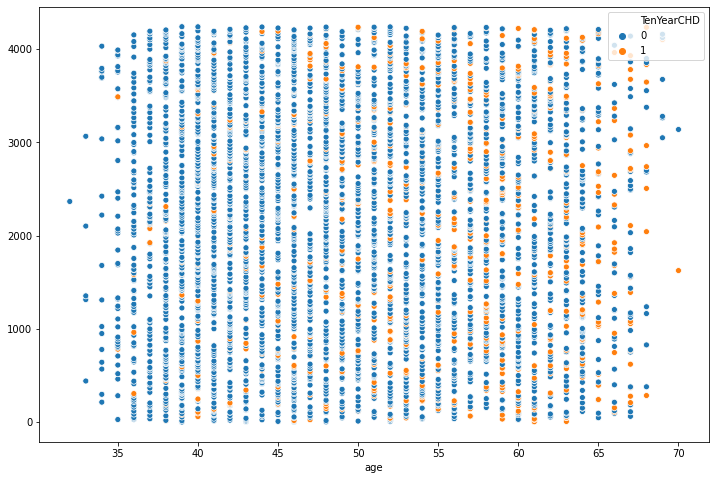

In [103]:
plt.figure(figsize=(12,8))
sns.scatterplot(y=np.arange(len(df)),x='age',data=df,hue='TenYearCHD')
plt.legend(loc='upper right')

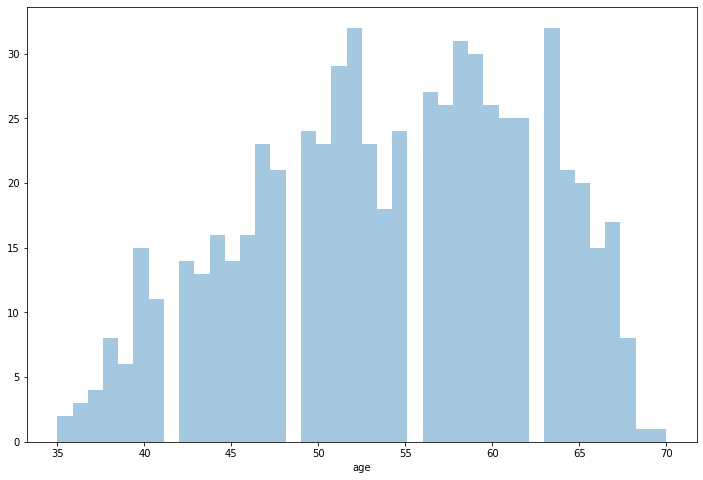

In [104]:
plt.figure(figsize=(12,8))
sns.distplot(df[df['TenYearCHD']==1]['age'],kde=False,bins=40)

In [105]:
df.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.029014,0.018681,0.197026,0.317409,-0.051808,-0.004550,0.005853,0.015693,-0.070126,-0.035879,0.058199,0.081765,-0.116911,0.003436,0.088374
age,-0.029014,1.000000,-0.161880,-0.213662,-0.191172,0.121434,0.057679,0.306799,0.101314,0.259290,0.394053,0.205586,0.135172,-0.012835,0.118894,0.225408
education,0.018681,-0.161880,1.000000,0.017478,0.006505,-0.010440,-0.035037,-0.079293,-0.035899,-0.025492,-0.127190,-0.060706,-0.133835,-0.053997,-0.031752,-0.054110
currentSmoker,0.197026,-0.213662,0.017478,1.000000,0.765099,-0.047493,-0.032980,-0.103710,-0.044285,-0.044834,-0.130281,-0.107933,-0.167187,0.062681,-0.052718,0.019448
cigsPerDay,0.317409,-0.191172,0.006505,0.765099,1.000000,-0.042958,-0.032637,-0.068217,-0.037024,-0.026528,-0.090278,-0.059051,-0.092798,0.074392,-0.053958,0.057743
BPMeds,-0.051808,0.121434,-0.010440,-0.047493,-0.042958,1.000000,0.114139,0.257975,0.050926,0.076804,0.250662,0.190456,0.097770,0.016393,0.046615,0.085325
prevalentStroke,-0.004550,0.057679,-0.035037,-0.032980,-0.032637,0.114139,1.000000,0.074791,0.006955,0.000101,0.057000,0.045153,0.024105,-0.017674,0.015799,0.061823
prevalentHyp,0.005853,0.306799,-0.079293,-0.103710,-0.068217,0.257975,0.074791,1.000000,0.077752,0.163061,0.696656,0.615840,0.300262,0.146780,0.081127,0.177458
diabetes,0.015693,0.101314,-0.035899,-0.044285,-0.037024,0.050926,0.006955,0.077752,1.000000,0.041024,0.111265,0.050260,0.085064,0.048986,0.590268,0.097344
totChol,-0.070126,0.259290,-0.025492,-0.044834,-0.026528,0.076804,0.000101,0.163061,0.041024,1.000000,0.206733,0.163439,0.115682,0.090306,0.049900,0.082749


In [0]:
# currentSmoker (high corr with)	cigsPerDay
# prevalentHyp (high corr with) sysBP (high corr with) diaBP
# glucose (high corr with) diabetes

In [0]:
df.drop(['currentSmoker','prevalentHyp','diaBP','diabetes'],inplace=True,axis=1)

In [122]:
df.head()

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0.0,0.0,0,195.0,106.0,26.97,80.0,77.0,0
1,0,46,2.0,0.0,0.0,0,250.0,121.0,28.73,95.0,76.0,0
2,1,48,1.0,20.0,0.0,0,245.0,127.5,25.34,75.0,70.0,0
3,0,61,3.0,30.0,0.0,0,225.0,150.0,28.58,65.0,103.0,1
4,0,46,3.0,23.0,0.0,0,285.0,130.0,23.10,85.0,85.0,0


In [0]:
X=df.drop('TenYearCHD',axis=1)
y=df['TenYearCHD']

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
ss=StandardScaler().fit(X_train)

In [0]:
X_train=ss.transform(X_train)

In [0]:
X_test=ss.transform(X_test)

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
classifier =LogisticRegression().fit(X_train,y_train)

In [0]:
predictions=classifier.predict(X_test)

In [0]:
from sklearn.metrics import confusion_matrix,classification_report

In [138]:
confusion_matrix(y_test,predictions)

array([[896,   9],
       [138,  17]])

In [140]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92       905
           1       0.65      0.11      0.19       155

    accuracy                           0.86      1060
   macro avg       0.76      0.55      0.56      1060
weighted avg       0.84      0.86      0.82      1060

